# Intorduction

In this section, we will analyze how customers use our services and how new customers can predict their charges and usages by answering the following questions:

<ul>
<li>What is the average monthly charge per gigabyte of download?</li>
<li>How are satisfaction scores spread accross each internet type?</li>
<li>How many customers use the company's internet services to stream TV, music, or movies?</li>
</ul>

# Import and load data

In [1]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

from data_loader import load_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_data("telco.csv", "raw", False) 

# 1- Average monthly charge per gigabyte of download

Here; we will see the relationship between the average monthly charge and the monthly gigabyte donwload amount

In [3]:
# Find the minimum and maximum values of monthly charge
data["Monthly Charge"].min(), data["Monthly Charge"].max()

(np.float64(18.25), np.float64(118.75))

In [4]:
# Find the minimum and maximum values of GB download
data["Avg Monthly GB Download"].min(), data["Avg Monthly GB Download"].max()

(np.int64(0), np.int64(85))

In [5]:
# According to minimum and maximum values, create a new column "Charge Category" which represents the charge range
charge_bins = [18, 38, 58, 78, 98, 119]
charge_labels = ["18-38", "38-58", "58-78", "78-98", "98-119"]
data['Charge Category'] = pd.cut(data['Monthly Charge'], bins=charge_bins, labels=charge_labels)

In [6]:
# According to minimum and maximum values, create a new column "GB Category" which represents the GB download range
gb_bins = [0, 15, 30, 45, 60, 75, 90]
gb_labels = ["0-15", "15-30", "30-45", "45-60", "60-75", "75-90"]
data['GB Category'] = pd.cut(data["Avg Monthly GB Download"], bins=gb_bins, labels=gb_labels)

In [7]:
# pivot table to represent data shown in the heatmap
heatmap_data = data.pivot_table(index='Charge Category', columns='GB Category', aggfunc='size', fill_value=0, observed=False)

In [8]:
# Confirm that the heatmap data has no null values
heatmap_data.isnull().value_counts()

0-15   15-30  30-45  45-60  60-75  75-90
False  False  False  False  False  False    5
Name: count, dtype: int64

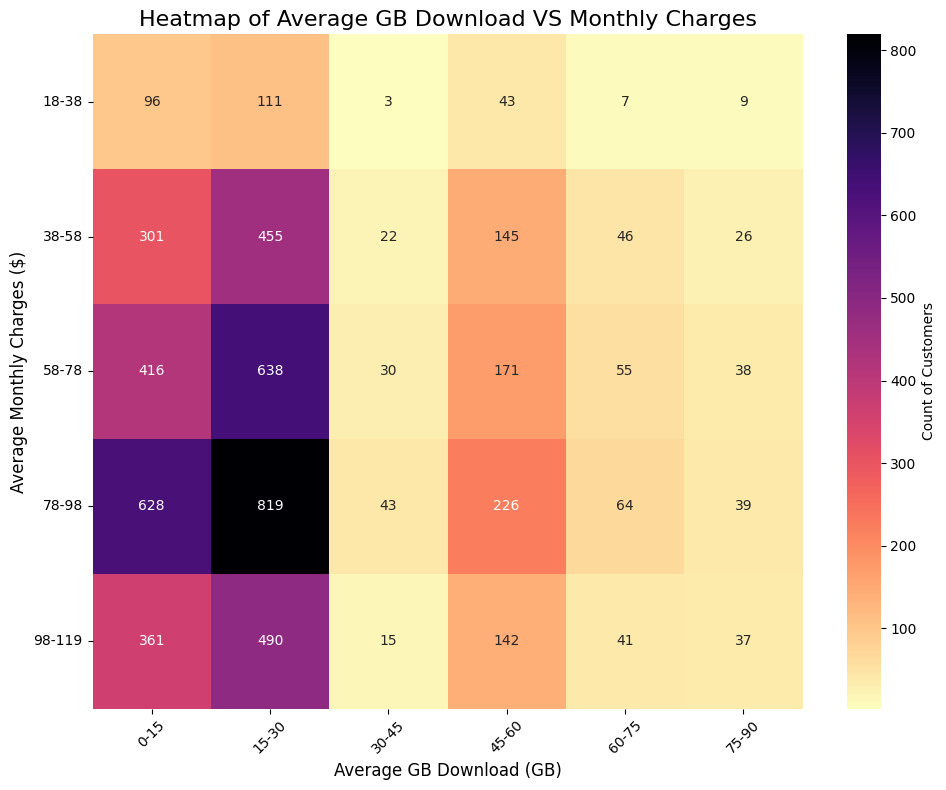

In [9]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    cmap="magma_r",
    annot=True,  # Show values in cells
    fmt='d',  # Integer format for counts
    cbar_kws={'label': 'Count of Customers'}
)

plt.title('Heatmap of Average GB Download VS Monthly Charges', fontsize=16)
plt.xlabel('Average GB Download (GB)', fontsize=12)
plt.ylabel('Average Monthly Charges ($)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../Visualizations/GB_vs_charge.png")

We can now conclude many findings such as:
<ul>
<li>Most customers (819 of them) use between 15 and 30 GB per month and pay between 78 and 98 dollars</li>
<li>361 customers download a small amount of GBs (0 to 15 GB) but pay a lot (between 98 and 119 dollars) which can be due some premium services</li>
<li>Customers mostly use between 0 and 30 Gigabytes of internet monthly</li>
</ul>

# 2-How are satisfaction scores spread accross each internet type?

Now, we will try to find the average number of statisfaction scores for each internet type

In [10]:
# Value counts of each internet type
type_counts = data["Internet Type"].value_counts()

In [11]:
# Explore the different types of internet
type_counts

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [12]:
avgs = [] # Will contain the average score for each internet type
types = [] # Will contain the name of each internet type
for type in type_counts.index:
    # Append each type name to the types list
    types.append(type)
    # Append the mean of satisfaction scores for each internet type
    avgs.append(data[data["Internet Type"] == type]["Satisfaction Score"].mean())

## Plot the results

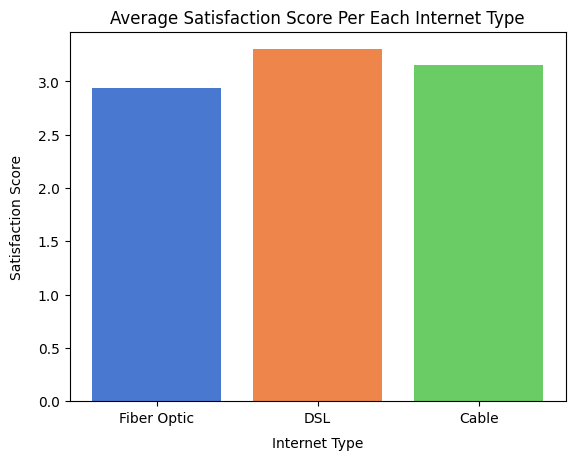

In [13]:
plt.bar(types, avgs, color=sns.color_palette("muted"))
plt.title("Average Satisfaction Score Per Each Internet Type")
plt.xlabel("Internet Type", labelpad=8)
plt.ylabel("Satisfaction Score", labelpad=10)
plt.savefig("../Visualizations/Avg_satisfaction_per_type.png")

And we can conclude that the internet type that received the biggest satisfaction score on average is DSL

# 3-How many customers use the company's internet services to stream TV, music, or movies?

In this section, we will see how many customers use each streaming service

In [62]:
tv = len(data[data["Streaming TV"] == "Yes"]) # number of tv streamers
music = len(data[data["Streaming Music"] == "Yes"]) # number of music streamers
movies = len(data[data["Streaming Movies"] == "Yes"]) # number of movie streamers

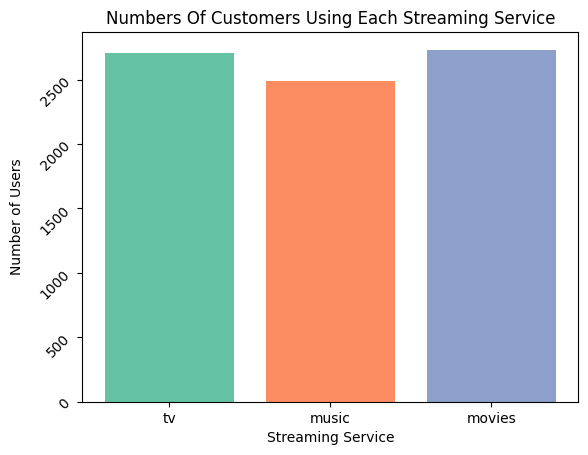

In [61]:
counts = [tv, music, movies] # counts of each service streamers
streamings = ["tv", "music", "movies"] # labels of each streaming service
plt.bar(streamings, counts, color=sns.color_palette("Set2"))
plt.title("Numbers Of Customers Using Each Streaming Service")
plt.xlabel("Streaming Service")
plt.ylabel("Number of Users", labelpad=10)
plt.yticks(rotation=45)
plt.savefig("../Visualizations/Streaming_usage.png")

And with this visualization, we conclude that most customers stream movies